**Question 3** - We need to Create a Front end using github that shows candlestic chart with overlaid Average True Range (ATR) chart and Moving Standard Deviation on an underlaid chart Moving Standard Deviation "Close" price, as well as the "ATR." Moving standard deviation where N should be dynamic and user defined.




**Approach**

step-by-step documentation of the given code:

1. First, the necessary libraries are imported, including pandas, numpy, and matplotlib.

2. The code then reads in a CSV file of financial data and stores it as a pandas DataFrame. The DataFrame is indexed by the 'Timestamp' column, which is converted to a datetime object.

3. The code calculates the true range (TR) of the asset for each time period. TR is a measure of volatility and is calculated as the maximum of the following three values:

a. The difference between the high and low price for the period.

b. The absolute difference between the high price and the previous period's close.

c. The absolute difference between the low price and the previous period's close.

4. These three values are calculated for each time period and stored as new columns in the DataFrame. The maximum of these three values is then calculated for each time period and stored as a new column called 'TR'.

5. The code calculates the average true range (ATR) of the asset over a rolling 14-day period. A rolling window is a moving time period that is used to calculate a statistic. In this case, the ATR is calculated using a rolling window of 14 days. The rolling function is used to apply a lambda function to the 'TR' column of the DataFrame. The lambda function calculates the ATR for each time period by summing the previous 13 TR values and adding the current TR value, then dividing by 14.

6. The code prompts the user to enter a window size for the moving standard deviation (MSD). The MSD is a measure of how spread out the prices are over a rolling time period. The larger the MSD, the more volatile the prices are.

7. The MSD is calculated using a rolling window of the specified size. The rolling function is used to apply the 'std' function to the 'Close' column of the DataFrame.

8. The code prompts the user to enter a start and end date for the time period to be plotted.

9. The code filters the DataFrame based on the specified date range.

10. The code creates a new DataFrame called 'ohlc' that only contains the 'Open', 'High', 'Low', and 'Close' columns. The 'ohlc' DataFrame is then reset so that the 'Timestamp' column is an integer index.

11. The code creates a new figure with two subplots: one for the candlestick chart and one for the ATR and MSD plots. The subplots share the same x-axis.

12. The candlestick chart is plotted on the first subplot using the candlestick_ohlc function from the mplfinance library. The x-axis is formatted to display dates in the format 'YYYY-MM-DD'. The x and y-axis labels are set, and the plot is given a title.

13. The ATR plot is plotted on the second subplot using the plot function. The x-axis is set to the index of the 'atr' Series, which is the filtered ATR data. The y-axis label is set, and a legend is added.

14. The MSD plot is plotted on the second subplot using the twinx function to create a second y-axis on the right-hand side of the plot. The x-axis is set to the index of the 'moving_sd' Series, which is the filtered MSD data. The y-axis label is set, and a legend is added.

The final output plot is given

Enter window size for moving standard deviation:  6
Enter start date (YYYY-MM-DD):  2012-01-01
Enter end date (YYYY-MM-DD):  2014-01-01


Date range not in data.


C:\Users\Asus\AppData\Local\Temp\ipykernel_1560\3723654121.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Timestamp'] = ohlc['Timestamp'].apply(mdates.date2num)


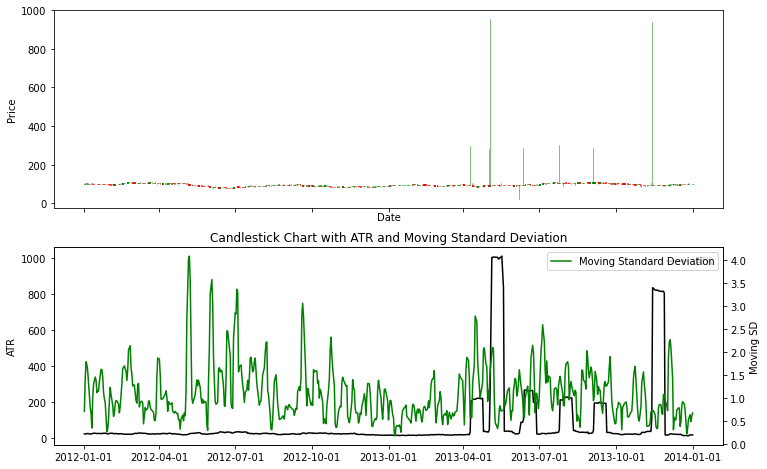

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Load data
df = pd.read_csv("C:/Users/Asus/Documents/Candlestick-Chart-with-ATR-and-MSD/Data/CL Data.csv")

# Convert the 'Timestamp' column to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the index to the 'Timestamp' column
df.set_index('Timestamp', inplace=True)

# Calculate true range
df['H-L'] = df['High'] - df['Low']
df['H-PC'] = np.abs(df['High'] - df['Close'].shift(1))
df['L-PC'] = np.abs(df['Low'] - df['Close'].shift(1))
df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)

# Calculate ATR
n = 14
df['ATR'] = df['TR'].rolling(n).apply(lambda x: ((n-1)*x[:-1].sum() + x[-1])/n, raw=True)

# Calculate moving standard deviation
window_size = int(input("Enter window size for moving standard deviation: "))
df['Moving SD'] = df['Close'].rolling(window_size).std()



# Add a slicer for adjusting the date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")
try:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    if start_date not in df.index or end_date not in df.index:
        raise ValueError("Date range not in data.")
except ValueError as e:
    print(e)

# Filter data based on slicer date range
df_slice = df.loc[start_date:end_date]

# Create candlestick chart
ohlc = df_slice[['Open', 'High', 'Low', 'Close']]
ohlc.reset_index(inplace=True)
ohlc['Timestamp'] = ohlc['Timestamp'].apply(mdates.date2num)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
candlestick_ohlc(ax1, ohlc.values, width=0.6, colorup='green', colordown='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')


# Add ATR plot
atr = df_slice['ATR']
ax2.plot(atr.index, atr.values, color='black', label='ATR')
ax2.set_ylabel('ATR')
ax2.legend()

# Add Moving SD plot
moving_sd = df_slice['Moving SD']
ax3 = ax2.twinx()
ax3.plot(moving_sd.index, moving_sd.values, color='Green',label='Moving Standard Deviation')
ax3.set_ylabel('Moving SD')
ax3.grid(False)
ax3.legend()


plt.xlabel('Date')
plt.title('Candlestick Chart with ATR and Moving Standard Deviation')
# Show plot
plt.show()
